# Stellar Contrails: Plummer likelihood example

In this example, we will use example stellar kinematic data in the `examples/data/` folder to illustrate how to use the Plummer likelihood function

In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys,os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams
import copy
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rcParams['text.usetex'] = True
rcParams['text.latex.unicode'] = True

from stellarContrails import LL

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

First, we load in the kinematic data.

In [3]:
null_data = np.loadtxt("data/null_data.txt")
subhalo_data = np.loadtxt("data/subhalo_data.txt")

The datasets above are constructed from a background distribution of stars within an ROI with the following properties:
1.  ROI radius R = 0.2 kpc
2.  Background velocity distribution a Maxwell-Boltzmann distribution with $v_0 = 220$ km/s.
3.  Stellar number density $n_0 = 10^7$ kpc$^{-3}$

**Null Data**
1.  No subhalo present

**Subhalo data**
1.  Subhalo currently at the origin x,y,z = 0,0,0 kpc.
2.  Subhalo velocity ${\bf v} = 300 \, \text{km/sec} \, {\bf \hat x}$

**Data format**

The data is a list of kinematic data, of the form $[x,y,z,v_x,v_y,v_z]$.  All positions are in kpc and velocities in km/sec.



## Add velocity uncertainties to data

In [41]:
vel_u = 1.0*np.sqrt(1/3.0)

subhalo_data_u = copy.deepcopy(subhalo_data)
null_data_u = copy.deepcopy(null_data)

In [42]:
for i in range(len(subhalo_data_u)):
    subhalo_data_u[i,3:] += np.random.normal(scale=vel_u,size=3)
    
for i in range(len(null_data_u)):
    null_data_u[i,3:] += np.random.normal(scale=vel_u,size=3)

## Construct likelihood profiles as functions of $M_\text{sh}$

Now we will use the `stellarContrails.LL` package to construct likelihood profiles as function $M_\text{sh}$

In [43]:
# Fixed model parameters
R = 0.2 #ROI radius in kpc
ns = 1e7 #number density normalization parameter in kpc^{-3}
v0 = 20 # velocity dispersion parameter of Maxwell-Boltzmann of background phase-space in km/s
sub_halo_phase = np.array([0.0,0.0,0.0,300.0,0.0,0.0]) #sub-halo phase-space point [x,y,z,vx,vy,vz] in kpc and km/s

In [44]:
def return_rs(M_sh):
    '''Return the expected Plummer radius rs in kpc for subhalo mass M_sh in solar masses'''
    rs = 1.62*(M_sh/10**8)**0.5
    return rs

In [46]:
##Make an array of Masses
Msh_list = 10**np.linspace(4,7,100) #Mass list in solar masses
rs_list = return_rs(Msh_list) #Plummer radius list in kpc

LL_array_null = np.zeros(100) #List for log-likelihood values for data without subhalo
LL_array_subhalo = np.zeros(100) #List for log-likelihood values for data with subhalo
LL_array_subhalo_u = np.zeros(100) #List for log-likelihood values for data with subhalo
LL_array_null_u = np.zeros(100) #List for log-likelihood values for data with subhalo

for i in range(100): #iterate through list and fill in log-likelihood values
    LL_array_null[i] = LL.Plummer(null_data,sub_halo_phase,Msh_list[i],rs_list[i],v0,R,ns)
    LL_array_subhalo[i] = LL.Plummer(subhalo_data,sub_halo_phase,Msh_list[i],rs_list[i],v0,R,ns)
    LL_array_subhalo_u[i] = LL.Plummer(subhalo_data_u,sub_halo_phase,Msh_list[i],rs_list[i],v0,R,ns)
    LL_array_null_u[i] = LL.Plummer(null_data_u,sub_halo_phase,Msh_list[i],rs_list[i],v0,R,ns)

In [62]:
v0_list = np.linspace(19.5,20.5,100)
LL_array_subhalo_v0_u = np.zeros(100)
LL_array_subhalo_v0 = np.zeros(100)
for i in range(100): #iterate through list and fill in log-likelihood values
    LL_array_subhalo_v0_u[i] = LL.Plummer(subhalo_data_u,sub_halo_phase,1.0,0.0001,v0_list[i],R,ns)
    LL_array_subhalo_v0[i] = LL.Plummer(subhalo_data,sub_halo_phase,1.0,0.0001,v0_list[i],R,ns)


## Plot the likelihood profiles

(19.9, 20.1)

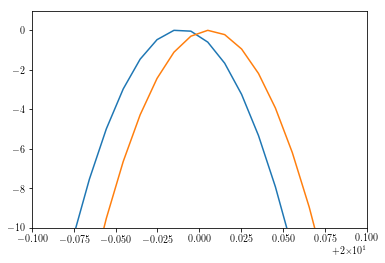

In [66]:
plt.plot(v0_list,LL_array_subhalo_v0-np.max(LL_array_subhalo_v0))
plt.plot(v0_list,LL_array_subhalo_v0_u-np.max(LL_array_subhalo_v0_u))
plt.ylim([-10,1])
plt.xlim(19.9,20.1)

In [65]:
v0_list[np.argmax(LL_array_subhalo_v0)],v0_list[np.argmax(LL_array_subhalo_v0_u)]

(19.984848484848484, 20.005050505050505)

(-25, 25)

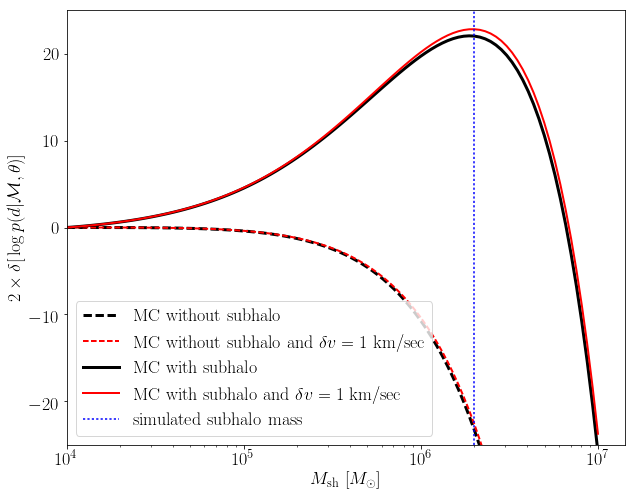

In [53]:
fig = plt.figure(figsize=(10,8))

plt.plot(Msh_list,2*(LL_array_null-LL_array_null[0]),"k--",label="MC without subhalo" ,linewidth=3)
plt.plot(Msh_list,2*(LL_array_null_u-LL_array_null_u[0]),"r--",label="MC without subhalo and $\delta v = 1$ km/sec" ,linewidth=2)
plt.plot(Msh_list,2*(LL_array_subhalo-LL_array_subhalo[0]),"k-",label = "MC with subhalo" ,linewidth=3)
plt.plot(Msh_list,2*(LL_array_subhalo_u-LL_array_subhalo_u[0]),"r-",label = r"MC with subhalo and $\delta v = 1$ km/sec",linewidth=2 )

plt.axvline(2e6,color="blue",linestyle="dotted",label="simulated subhalo mass")

plt.xscale('log')
plt.legend(fontsize=18)
plt.xlabel(r'$M_{\mathrm{sh}}$ [$M_\odot$]',fontsize=18)
plt.ylabel(r'$2 \times \delta \big[ \log p(d| \mathcal{M}, {\bf \theta}) \big]$',fontsize=18) #{\mathcal{L}}

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.ylim([-25,25])